Imports, plotting inline

In [92]:
from rhocube import *
from models import *
import pylab as p
import matplotlib
%matplotlib inline
from copy import copy

def myplot(images,titles=None):
    if not isinstance(images,list):
        images = [images]
    n = len(images)
    if titles is not None:
        assert (len(titles)==n)
    fig = p.figure(figsize=((2.5+0.4)*n,2.5))
    for j,image in enumerate(images):
        ax = fig.add_subplot(1,n,j+1)
        im = ax.imshow(image,origin='lower',extent=[-1,1,-1,1],cmap=matplotlib.cm.Blues_r,interpolation='bicubic')
        if titles is not None:
            ax.set_title(titles[j],fontsize=9)

# Cube class

# Available models
All models, whether provided with rhocube or own, inherit basic functionality from a `Cube` class. The class provides a `npix`^3 cube of voxels, their 3D coordinate arrays `X,Y,Z`, and several *methods for constructing* the density field rho(x,y,z). It also provides methods for *shifting* the model in x and z directions, and, for models where this is appropriate, for *rotating* the model along some of the principal axes.

## PowerLawShell
The PowerLawShell model is spherically symmetric, has an inner and outer radius, and the density falls of in radial direction as 1/r^exponent. Instantiate a constant-density shell model with inner radius = 0.5, outer radius = 0.6, in a 101^2 pixel image (=101^3 cube of computed voxels).

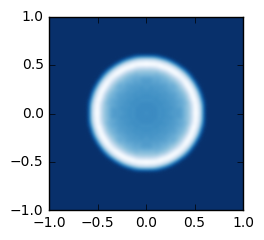

In [93]:
model = PowerLawShell(101,exponent=0.)   # npix, radial exponent 1/r^exponent (0 = constant-density shell)
args = (0.5,0.6,0,0,None)  # rin, rout, xoff, yoff, weight
model(*args)  # call the model instance with these parameter values
myplot(model.image)  # the computed rho(x,y,z) in in model.rho; the z-integrated rho_surface(x,y) is in model.image

The shell model can also be **shifted** in x and y direction on the image. The x-axis points right, the y-axis points up.

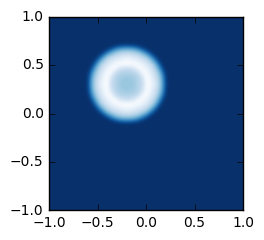

In [94]:
args = (0.2,0.4,-0.2,0.3,None) # same model instance, but different parameter values, and shifted left and up
model(*args)
myplot(model.image)

Let's plot shells with different radial powers.

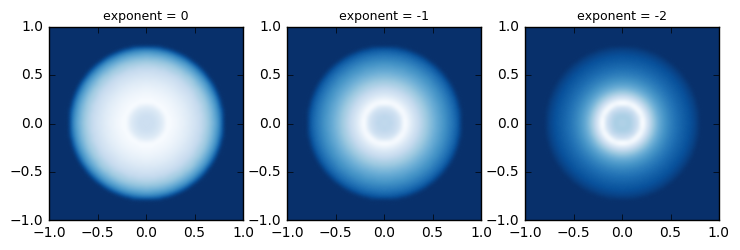

In [98]:
#fig = p.figure(figsize=(10,3))
args = (0.2,0.8,0,0,None)
powers = (0,-1,-2)   # the exponents in 1/r^exponent
images, titles = [], []
for j,pow in enumerate(powers):
    mod = PowerLawShell(101,exponent=pow)
    mod(*args)
    images.append(mod.image)
    titles.append("exponent = %d" % pow)
    
myplot(images,titles)

## Constant-density torus
The torus model has a torus radius and a tube radius, can be offset in x and y, and can be **tilted** along the x-axis (points right) and z-axis (points to the observer). The tilts are given in degrees.

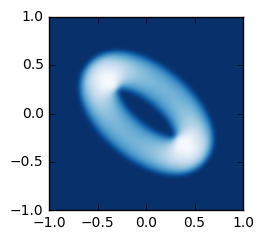

In [99]:
model = ConstantDensityTorus(101)
args = (0.6,0.2,0,0,30,40,None) # radius, tube radius, xoff, yoff, tiltx, tiltz, weight
model(*args)
myplot(model.image)

## Constant-density dual cone
The dual cone model has a height (from center) and a opening angle theta (in degrees). Like torus, the dual cone can be tilted along the x and z axes, and shifted in x and y.

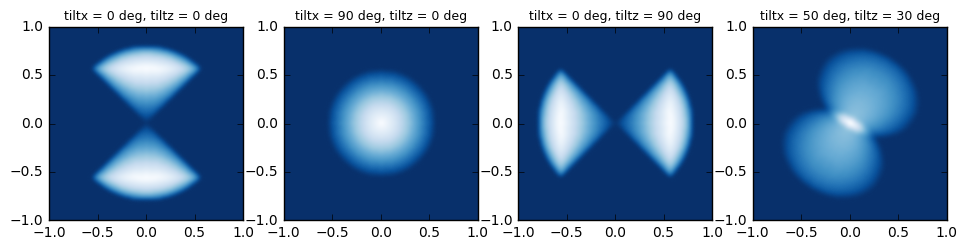

In [100]:
model = ConstantDensityDualCone(101)
tilts = ([0,0],[90,0],[0,90],[50,30])
args = [[0.8,45]+tilts_+[0,0,None] for tilts_ in tilts]
images, titles = [],[]
for j,args_ in enumerate(args):
    model(*args_)
    images.append(model.image) 
    titles.append('tiltx = %d deg, tiltz = %d deg' % (args[j][2],args[j][3]))
myplot(images,titles)

## Helix
The density fields computed by `rhocube` need not be spherically or axially symmetric. A model provided with `rhocube` is a 3D helical tube, i.e. a parametric curve with a given tube cross-section.

Let's define a helix that spirals outwards along the surface of a dual cone:

Building kdtree


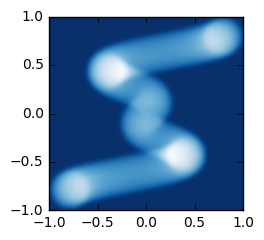

In [102]:
model = Helix3D(101,envelope='dualcone')
args = (0.8,1,0.2,0,0,0,0,0,None) # height from center (= radius at top), number of turns, tube cross-section, 3 tilts, 2 offsets, weight
model(*args)
myplot(model.image)

This class of models internall computes a **k-d tree** to speed up subsequent computations of the density field. Note that the **k-d tree construction time is an expensive function** of `npix`. The subsequent computations are then much faster. In other words: you might not have the patience to wait for a 301^3 voxel tree to be constructed.

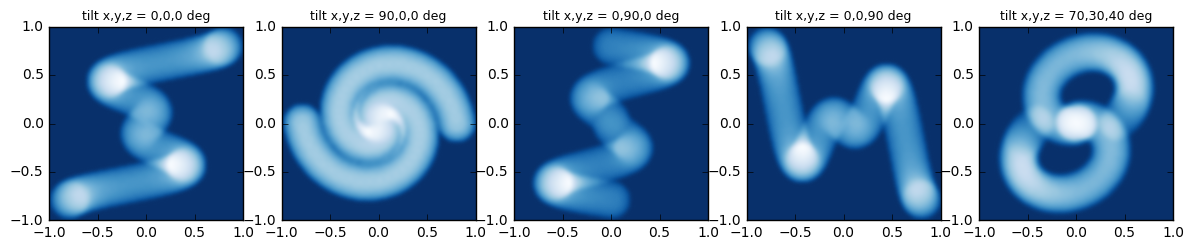

In [116]:
tilts = ([0,0,0],[90,0,0],[0,90,0],[0,0,90],[70,30,40])
args = [[0.8,1,0.2]+tilts_+[0,0,None] for tilts_ in tilts]
images, titles = [],[]
for j,args_ in enumerate(args):
    model(*args_)
    images.append(model.image) 
    titles.append('tilt x,y,z = %d,%d,%d deg' % (args[j][3],args[j][4],args[j][5]))
myplot(images,titles)

The helix can also spriral along the surface of a cylinder:

Building kdtree


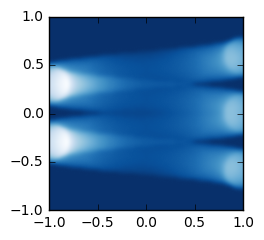

In [118]:
model = Helix3D(101,envelope='cylinder')
args = (0.6,1,0.2,0,0,0,0,0,None) # height from center (= radius at top), number of turns, tube cross-section, 3 tilts, 2 offsets, weight
model(*args)
myplot(model.image)

Same shell but smaller and shifted left-up, plus a truncated normal shell (Gaussian) shell of radius 0.4, width 0.1 (1-sigma), shifted right. The relative weights of the two shells are 0.5 and 1.0 (total mass contained per shell).

('ConstantDensityShell', 0.3, 0.4, -0.3, 0.3, 0.5)
typ:  ConstantDensityShell
args:  (0.3, 0.4, -0.3, 0.3, 0.5)
('TruncatedNormalShell', 0.4, 0.1, 0, 1, 0.3, 0.0, 1)
typ:  TruncatedNormalShell
args:  (0.4, 0.1, 0, 1, 0.3, 0.0, 1)


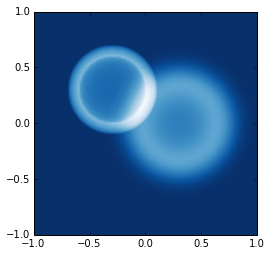

In [3]:
cube = rhocube.Cube(200, ( ('ConstantDensityShell',0.3,0.4,-0.3,0.3,0.5), ('TruncatedNormalShell',0.4,0.1,0,1,0.3,0.,1)))
im = p.imshow(cube.image,origin='lower',extent=cube.extent,cmap=matplotlib.cm.Blues_r,interpolation='bicubic')

Constant-density torus, centered, edge-on

('ConstantDensityTorus', 0.5, 0.2, 0.0, 0.0, 0.0, 0.0, 1.0)
typ:  ConstantDensityTorus
args:  (0.5, 0.2, 0.0, 0.0, 0.0, 0.0, 1.0)


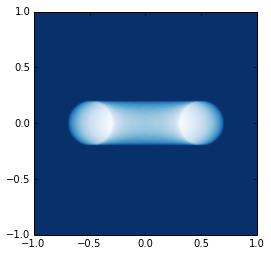

In [4]:
cube = rhocube.Cube(200, ( ('ConstantDensityTorus',0.5,0.2,0.,0.,0.,0.,1.), ))
im = p.imshow(cube.image,origin='lower',extent=cube.extent,cmap=matplotlib.cm.Blues_r,interpolation='bicubic')

Same torus, but rotated about the x-axis (points to the right) by 50 degrees, and about the z-axis (points to the observer) by 55 degrees

('ConstantDensityTorus', 0.5, 0.2, 0.0, 0.0, 50.0, 55.0, 1.0)
typ:  ConstantDensityTorus
args:  (0.5, 0.2, 0.0, 0.0, 50.0, 55.0, 1.0)


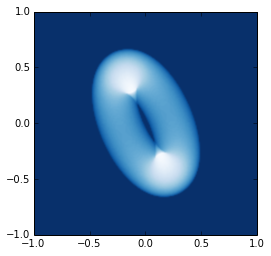

In [5]:
cube = rhocube.Cube(200, ( ('ConstantDensityTorus',0.5,0.2,0.,0.,50.,55.,1.), ))
im = p.imshow(cube.image,origin='lower',extent=cube.extent,cmap=matplotlib.cm.Blues_r,interpolation='bicubic')

Add Gaussian noise (PDF width is 20% of the std. deviation of all non-zero pixels in the clean image). No image interpolation here.

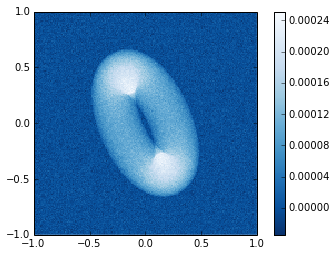

In [6]:
cube.add_noise(type='gauss',mode='std',magnitude=0.2)
im = p.imshow(cube.noisyimage,origin='lower',extent=cube.extent,cmap=matplotlib.cm.Blues_r,interpolation='none')
cb = p.colorbar(im)

Just the noise layer

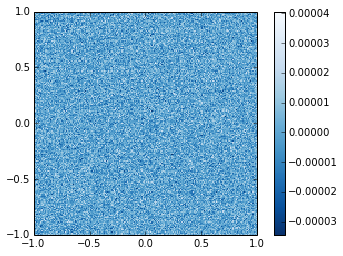

In [7]:
im = p.imshow(cube.errimage,origin='lower',extent=cube.extent,cmap=matplotlib.cm.Blues_r,interpolation='none')
cb = p.colorbar(im)